This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6132 - accuracy: 0.8118 - val_loss: 0.2991 - val_accuracy: 0.9068
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2505 - accuracy: 0.9222 - val_loss: 0.1960 - val_accuracy: 0.9418
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1631 - accuracy: 0.9493 - val_loss: 0.1541 - val_accuracy: 0.9543
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1162 - accuracy: 0.9645 - val_loss: 0.1466 - val_accuracy: 0.9561
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0852 - accuracy: 0.9733 - val_loss: 0.1329 - val_accuracy: 0.9620
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.1104 - val_accuracy: 0.9683
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.1524 - val_accuracy: 0.9575
Epoch 

**Plotting a validation accuracy comparison**

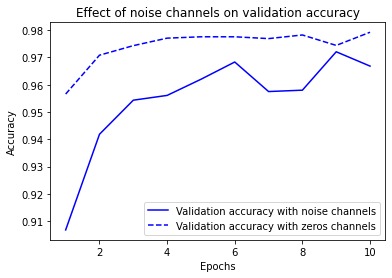

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3161 - accuracy: 0.1036 - val_loss: 2.3074 - val_accuracy: 0.1042
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2997 - accuracy: 0.1142 - val_loss: 2.3145 - val_accuracy: 0.0997
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2911 - accuracy: 0.1250 - val_loss: 2.3196 - val_accuracy: 0.1027
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2774 - accuracy: 0.1371 - val_loss: 2.3289 - val_accuracy: 0.1006
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2604 - accuracy: 0.1517 - val_loss: 2.3406 - val_accuracy: 0.0979
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2388 - accuracy: 0.1675 - val_loss: 2.3539 - val_accuracy: 0.0985
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2139 - accuracy: 0.1834 - val_loss: 2.3777 - val_accuracy: 0.0959

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 879.1729 - accuracy: 0.4098 - val_loss: 2.9711 - val_accuracy: 0.3839
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.2777 - accuracy: 0.3069 - val_loss: 3.7902 - val_accuracy: 0.3282
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1878 - accuracy: 0.2809 - val_loss: 2.3110 - val_accuracy: 0.3046
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2784 - accuracy: 0.2926 - val_loss: 2.8661 - val_accuracy: 0.2920
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0057 - accuracy: 0.2891 - val_loss: 2.1784 - val_accuracy: 0.3223
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0314 - accuracy: 0.2823 - val_loss: 2.0675 - val_accuracy: 0.2496
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5055 - accuracy: 0.2840 - val_loss: 2.6610 - val_accuracy: 0.3207
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3663 - accuracy: 0.9116 - val_loss: 0.1441 - val_accuracy: 0.9601
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1422 - accuracy: 0.9632 - val_loss: 0.1258 - val_accuracy: 0.9679
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1144 - accuracy: 0.9726 - val_loss: 0.1740 - val_accuracy: 0.9685
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9785 - val_loss: 0.2167 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9814 - val_loss: 0.2022 - val_accuracy: 0.9742
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9838 - val_loss: 0.1787 - val_accuracy: 0.9758
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9860 - val_loss: 0.2458 - val_accuracy: 0.9733
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6630 - accuracy: 0.8375 - val_loss: 0.3558 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3504 - accuracy: 0.9034 - val_loss: 0.3060 - val_accuracy: 0.9156
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.9130 - val_loss: 0.2891 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.9166 - val_loss: 0.2821 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.9190 - val_loss: 0.2756 - val_accuracy: 0.9243
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.9210 - val_loss: 0.2724 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9219 - val_loss: 0.2683 - val_accuracy: 0.9260
Epoch 

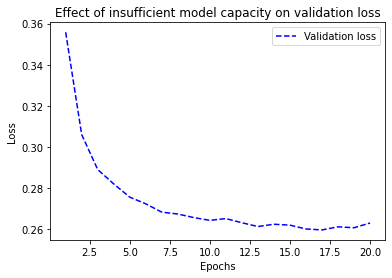

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3670 - accuracy: 0.8968 - val_loss: 0.1888 - val_accuracy: 0.9456
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1632 - accuracy: 0.9516 - val_loss: 0.1347 - val_accuracy: 0.9629
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1134 - accuracy: 0.9666 - val_loss: 0.1166 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9735 - val_loss: 0.1125 - val_accuracy: 0.9664
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9787 - val_loss: 0.1162 - val_accuracy: 0.9673
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.0937 - val_accuracy: 0.9743
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0912 - val_accuracy: 0.9742
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5393 - accuracy: 0.7913 - val_loss: 0.4276 - val_accuracy: 0.8422
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3342 - accuracy: 0.8975 - val_loss: 0.3192 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2436 - accuracy: 0.9217 - val_loss: 0.2830 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1913 - accuracy: 0.9388 - val_loss: 0.2941 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1543 - accuracy: 0.9540 - val_loss: 0.2857 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1301 - accuracy: 0.9594 - val_loss: 0.2894 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1110 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6049 - accuracy: 0.7146 - val_loss: 0.5245 - val_accuracy: 0.8540
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4521 - accuracy: 0.8811 - val_loss: 0.4216 - val_accuracy: 0.8773
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3518 - accuracy: 0.9121 - val_loss: 0.3556 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2849 - accuracy: 0.9218 - val_loss: 0.3153 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2396 - accuracy: 0.9328 - val_loss: 0.2933 - val_accuracy: 0.8919
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2063 - accuracy: 0.9401 - val_loss: 0.2875 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1803 - accuracy: 0.9489 - val_loss: 0.2755 - val_accuracy: 0.8931
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5353 - accuracy: 0.7603 - val_loss: 0.4024 - val_accuracy: 0.8154
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2585 - accuracy: 0.8980 - val_loss: 0.2668 - val_accuracy: 0.8939
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1489 - accuracy: 0.9433 - val_loss: 0.3628 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1143 - accuracy: 0.9677 - val_loss: 0.3336 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0501 - accuracy: 0.9860 - val_loss: 0.3667 - val_accuracy: 0.8714
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0068 - accuracy: 0.9997 - val_loss: 0.5119 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 8.2470e-04 - accuracy: 0.9999 - val_loss: 0.6022 - val_accuracy: 0.8879
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5819 - accuracy: 0.7963 - val_loss: 0.4823 - val_accuracy: 0.8427
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4002 - accuracy: 0.8947 - val_loss: 0.3904 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3357 - accuracy: 0.9137 - val_loss: 0.3648 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3035 - accuracy: 0.9225 - val_loss: 0.3593 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2838 - accuracy: 0.9299 - val_loss: 0.3871 - val_accuracy: 0.8688
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2681 - accuracy: 0.9369 - val_loss: 0.3635 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2612 - accuracy: 0.9357 - val_loss: 0.3573 - val_accuracy: 0.8843
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6274 - accuracy: 0.6465 - val_loss: 0.5195 - val_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5110 - accuracy: 0.7638 - val_loss: 0.4103 - val_accuracy: 0.8670
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4302 - accuracy: 0.8201 - val_loss: 0.3401 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3698 - accuracy: 0.8554 - val_loss: 0.2984 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3251 - accuracy: 0.8783 - val_loss: 0.2886 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2837 - accuracy: 0.8985 - val_loss: 0.2708 - val_accuracy: 0.8962
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2500 - accuracy: 0.9146 - val_loss: 0.2725 - val_accuracy: 0.8964
Epoch 8/20
30

## Summary